<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_396to408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **04 SVD(Singular Value Decomposition)**

### **SVD 개요**
- PCA와 유사한 행렬 분해 기법 이용.
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용

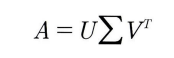

- SVD는 특이값 분해로 불리며, U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이벡터는 서로 직교하는 성질을 가짐

- 시그마는 대각 행렬로 대각에 위치한 값만 0이 아니고 나머지는 모두 0
- SVD는 A의 차원이 m x n 일 대 U의 차원이 m x m, 시그마의 차원이 m x n, V^t의 차원이 n x n 으로 분해 


---

하지만 일반적으로 시그마의 특이값이 0인 부분도 제거하고 이에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용
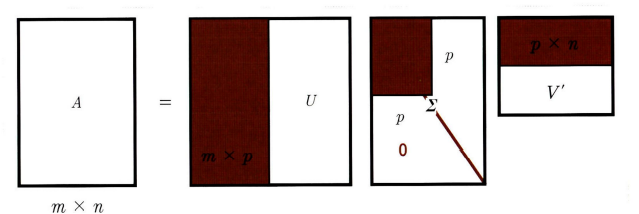

In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [2]:
#a행렬에 SVD를 적용해 U, Sigma, Vt를 도출

U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [4]:
#원본 행렬로 복원되는지 확인
# Sigma의 경우 0ㅇ이 아닌 값만 1차원으로 추출했기 때문에 다시 0을 포함한 대칭행렬로 변환

Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
#차원 축소 진행 알아보기
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [6]:
#로우 간의 관계가 매우 높아짐

U,Sigma,Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Valuen',np.round(Sigma,3))


(4, 4) (4,) (4, 4)
Sigma Valuen [2.663 0.807 0.    0.   ]


Sigma 값 중 두개가 0
- 선형 독립인 로우 벡터의 개수가 2개라는 의미
- 행렬의 랭크가 
- Sigma의 0에 대응 되는 데이터는 제외한 후 복원

In [9]:
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])

Vt_=Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD
- 시그마 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 정확하게 다시 원복할 수 없지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬에 근사시킬 수 있음

사이파이에서 Truncated SVD 지원

In [11]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt=svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

num_components=4
U_tr, Sigma_tr, Vt_tr=svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

### **사이킷런 TruncatedSVD 클래스르 이용한 변환**

사이킷런의 TruncatedSVD는 분해한 U, Sigma, Vt 행렬을 반환하지 않음

Text(0, 0.5, 'TruncatedSVD Component 2')

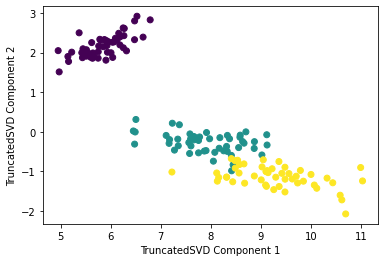

In [13]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data

tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)


Text(0.5, 1.0, 'PCA Transformed')

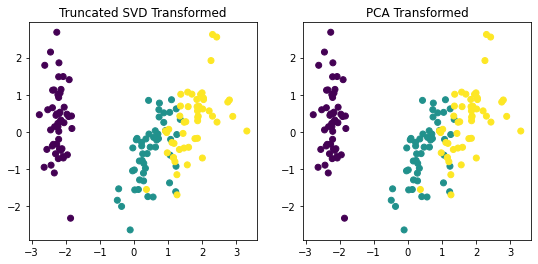

In [17]:
fig, (ax1, ax2)=plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [18]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3577494123738775e-15
7.632783294297951e-17


## **05 NMF(Non-Negative Matrix Factorization)**

###**NMF 개요**
NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭

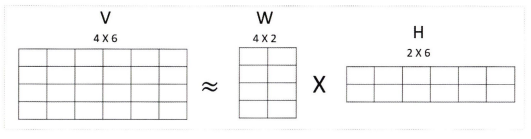

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

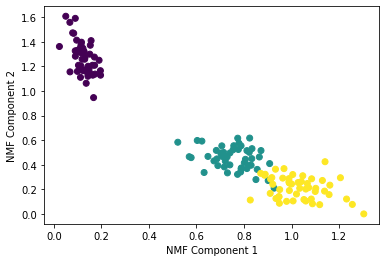

In [20]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을  통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용 됨

또한 영화 추천과 같은 추천 Recommendations 영역에 활발하게 적용

## **06 정리**

PCA, LDA, SVD, NMF
- 많은 피처로 이뤄진 데이터 세트를 차원 축소를 통해 직관적으로 이해
- 차원 축소는 단순히 피처의 개수를 줄이는 개념보다는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 더 큰 의미가 있음
- PCA: 입력 데이터의 변동성이 가장 큰 축을 구하고 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식, 입력 데이터의 공분산 행렬을 기반으로 고유 벡터를 생성하고 구한 고유 벡터에 입력 데이터를 선형변환하는 방식
- LDA: PCA와 매우 유사한 방식이지만 입력 데이터의 결정 값 크래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소
- SVD와 NMF는 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법, 원본 행렬에서 잠재된 요소를 추출하므로 토픽 모델링이나 추천 시스템에서 활발하게 사용